In [1]:
import pandas as pd
import numpy as np
import pdb
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import folium
from folium.plugins import HeatMap


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
!ls drive/My\ Drive/Save\ the\ Children/

 Data	       IDMC.ipynb			   TweetScraper
'idea 1.pdf'  'Primary Sources Extraction.ipynb'   unhcr.csv
'idea 2.pdf'  'Query List.gdoc'			   unhcr.gsheet
 idmc.csv     'Save the Children Research.gdoc'    UNHCR.ipynb
 idmc.gsheet   save_the_children_twitter.ipynb


In [4]:
import_path = 'drive/My Drive/Save the Children/idmc.csv'
idmc_df = pd.read_csv(import_path)
idmc_df.head()

,ISO3,Name,Year,Conflict Stock Displacement,Conflict New Displacements,Disaster New Displacements,Disaster Stock Displacement
0,#country+code,#country+name,#date+year,#affected+idps+ind+stock+conflict,#affected+idps+ind+newdisp+conflict,#affected+idps+ind+newdisp+disaster,#affected+idps+ind+stock+disaster
1,AB9,Abyei Area,2014,20000,NaN,NaN,NaN
2,AB9,Abyei Area,2015,82000,NaN,NaN,NaN
3,AB9,Abyei Area,2016,20000,NaN,NaN,NaN
4,AB9,Abyei Area,2017,31000,NaN,NaN,NaN


In [5]:
idmc_df = idmc_df.drop(idmc_df.index[0])

In [6]:
idmc_df = idmc_df.fillna(0)


In [8]:
idmc_df_af = idmc_df[idmc_df.Name == "Afghanistan"]



In [9]:
print(idmc_df_af)

   ISO3         Name  ... Disaster New Displacements Disaster Stock Displacement
7   AFG  Afghanistan  ...                       3400                           0
8   AFG  Afghanistan  ...                      28000                           0
9   AFG  Afghanistan  ...                      71000                           0
10  AFG  Afghanistan  ...                       3000                           0
11  AFG  Afghanistan  ...                      30000                           0
12  AFG  Afghanistan  ...                      15000                           0
13  AFG  Afghanistan  ...                      13000                           0
14  AFG  Afghanistan  ...                      71000                           0
15  AFG  Afghanistan  ...                       7400                           0
16  AFG  Afghanistan  ...                      27000                           0
17  AFG  Afghanistan  ...                     435000                           0
18  AFG  Afghanistan  ...   

In [ ]:
idmc_df[["Conflict Stock Displacement", "Conflict New Displacements", "Disaster New Displacements", "Disaster Stock Displacement"]] = idmc_df[["Conflict Stock Displacement", "Conflict New Displacements", "Disaster New Displacements", "Disaster Stock Displacement"]].apply(pd.to_numeric)

In [ ]:
idmc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 1 to 1556
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ISO3                         1556 non-null   object
 1   Name                         1556 non-null   object
 2   Year                         1556 non-null   object
 3   Conflict Stock Displacement  1556 non-null   int64 
 4   Conflict New Displacements   1556 non-null   int64 
 5   Disaster New Displacements   1556 non-null   int64 
 6   Disaster Stock Displacement  1556 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 97.2+ KB


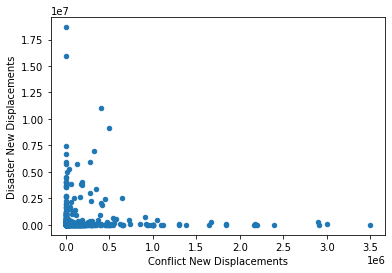

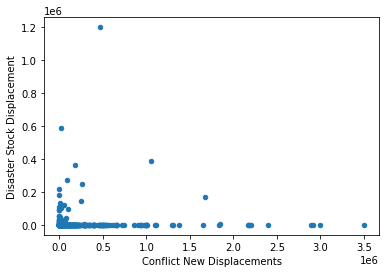

In [ ]:
idmc_df.plot(kind="scatter", x="Conflict New Displacements", y="Disaster New Displacements")
#idmc_df.plot(kind="scatter", x="Conflict New Displacements", y="Conflict Stock Displacement")
idmc_df.plot(kind="scatter", x="Conflict New Displacements", y="Disaster Stock Displacement")


In [ ]:
print(idmc_df.columns)

Index(['ISO3', 'Name', 'Year', 'Conflict Stock Displacement',
       'Conflict New Displacements', 'Disaster New Displacements',
       'Disaster Stock Displacement'],
      dtype='object')


In [ ]:
corr_matrix = idmc_df.corr()

In [ ]:
print(corr_matrix)

                             Conflict Stock Displacement  ...  Disaster Stock Displacement
Conflict Stock Displacement                     1.000000  ...                     0.111036
Conflict New Displacements                      0.641102  ...                     0.075899
Disaster New Displacements                      0.018255  ...                     0.095392
Disaster Stock Displacement                     0.111036  ...                     1.000000

[4 rows x 4 columns]


In [ ]:
corr_matrix['Conflict Stock Displacement'].sort_values(ascending=False)

Conflict Stock Displacement    1.000000
Conflict New Displacements     0.641102
Disaster Stock Displacement    0.111036
Disaster New Displacements     0.018255
Name: Conflict Stock Displacement, dtype: float64

In [ ]:
corr_matrix['Conflict New Displacements'].sort_values(ascending=False)

Conflict New Displacements     1.000000
Conflict Stock Displacement    0.641102
Disaster Stock Displacement    0.075899
Disaster New Displacements     0.040512
Name: Conflict New Displacements, dtype: float64

In [ ]:
corr_matrix['Disaster Stock Displacement'].sort_values(ascending=False)

Disaster Stock Displacement    1.000000
Conflict Stock Displacement    0.111036
Disaster New Displacements     0.095392
Conflict New Displacements     0.075899
Name: Disaster Stock Displacement, dtype: float64

In [ ]:
corr_matrix['Disaster New Displacements'].sort_values(ascending=False)

Disaster New Displacements     1.000000
Disaster Stock Displacement    0.095392
Conflict New Displacements     0.040512
Conflict Stock Displacement    0.018255
Name: Disaster New Displacements, dtype: float64

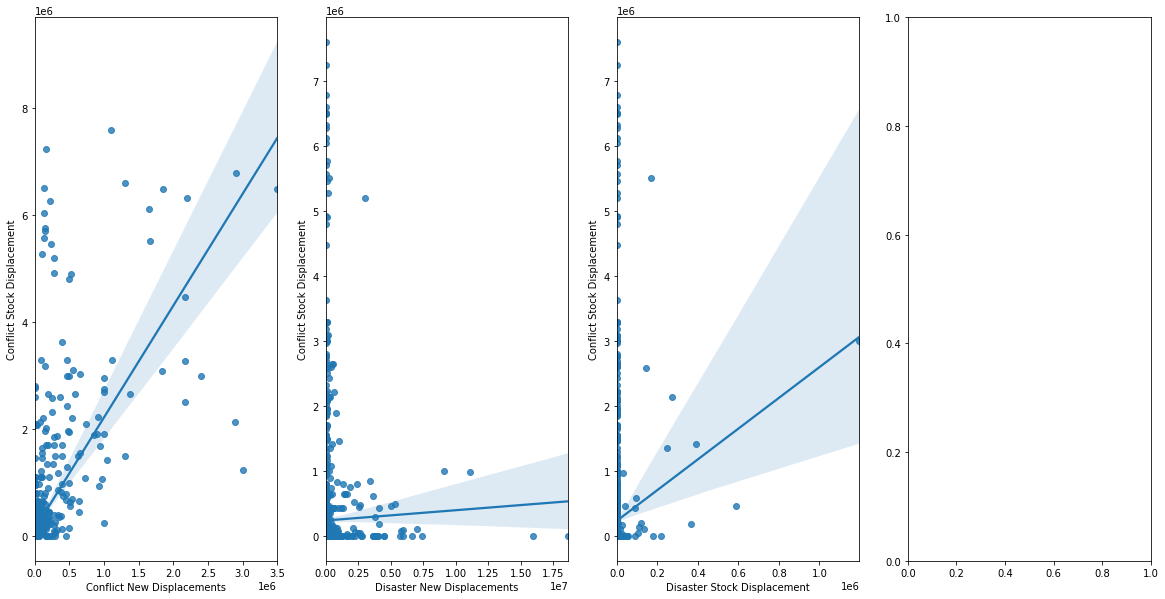

In [ ]:
#Plot the three features with the highest correlations
# demographics_df.plot(kind="scatter", x="Year", y="Female 0-4")
from sklearn import preprocessing
import seaborn as sns
#scale the data before plotting
std_scaler = preprocessing.StandardScaler()
column_corr = [
       'Conflict New Displacements', 'Disaster New Displacements',
       'Disaster Stock Displacement']
x_axis = idmc_df.loc[:,column_corr]
y_axis = idmc_df['Conflict Stock Displacement']
# x_axis = pd.DataFrame(data=std_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_corr):
    sns.regplot(x=k, y='Conflict Stock Displacement', data=idmc_df, ax=axs[i])

In [ ]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    """An simple implementation of the spliting into train and test sets"""
    shuffled_indices = np.random.permutation(len(data)) # Give it random indexes
    test_set_size = int(len(data) * test_ratio) # split into ratio
    test_indices = shuffled_indices[:test_set_size] # extract index of test examples
    train_indices = shuffled_indices[test_set_size:] # extract index of train examples
    return data.iloc[train_indices], data.iloc[test_indices] # return the splited data

In [ ]:
train_set, test_set = split_train_test(idmc_df, 0.2)
len(train_set)
print(train_set.shape)

(1245, 7)


In [ ]:
train_set = train_set[train_set.Name == "Afghanistan"]


In [ ]:
len(test_set)
print(test_set.shape)

(311, 7)


In [ ]:
test_set.head()


,ISO3,Name,Year,Conflict Stock Displacement,Conflict New Displacements,Disaster New Displacements,Disaster Stock Displacement
177,BOL,Bolivia,2011,0,0,11000,0
338,CRI,Costa Rica,2015,0,0,1100,0
737,KHM,Cambodia,2013,0,0,144000,0
1255,SRB,Serbia,2017,0,0,42,0
1303,TCD,Chad,2017,158000,5800,0,0


In [ ]:
housing = train_set.drop(['CRIM', 'RAD', 'B',  'ZN', 'CHAS', 'MEDV'], axis = 1)
housing_labels = train_set["MEDV"].copy()